In [102]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit ,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [103]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\BREAST_CANSER_CLASS_SVM\breast_cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Data Exploration

In [144]:
print(df.shape)

(569, 31)


In [105]:
df.duplicated().sum()

0

In [106]:
df.describe(include="all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [107]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Cleaning

In [108]:
x_train = df.drop(["id","Unnamed: 32"], axis=1,inplace=True)  
y_train = df["diagnosis"] 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [110]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [111]:
len(df[(df["diagnosis"] == "B")])

357

In [112]:
len(df[(df["diagnosis"] == "M")])

212

# Data Visualization

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

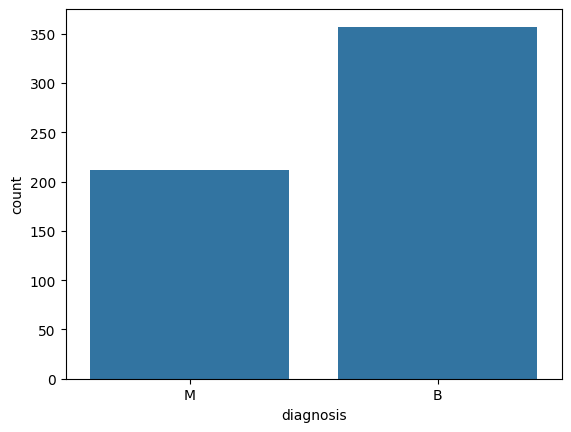

In [113]:
sns.countplot(data=df, x="diagnosis")

<AxesSubplot: xlabel='diagnosis', ylabel='radius_mean'>

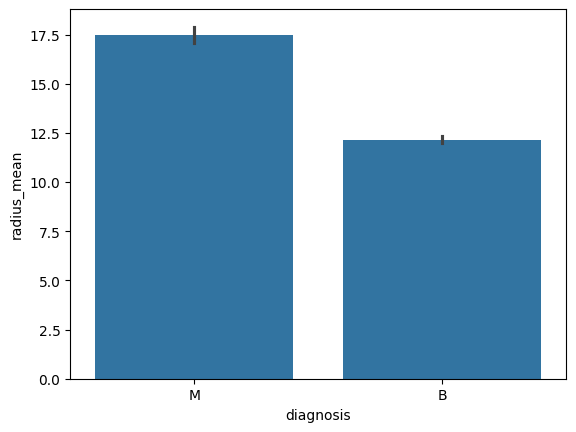

In [114]:
sns.barplot(data=df, x="diagnosis", y="radius_mean")

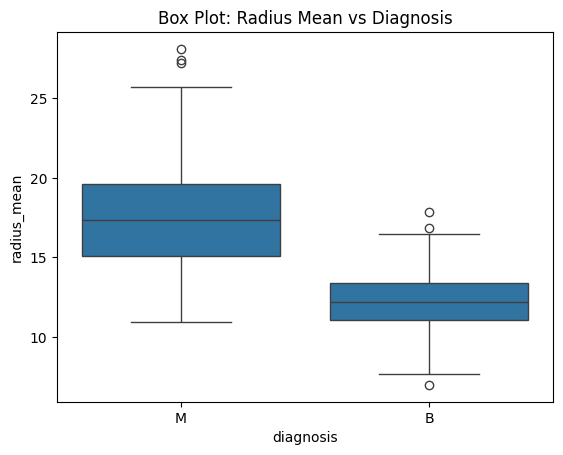

In [115]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Box Plot: Radius Mean vs Diagnosis')
plt.show()

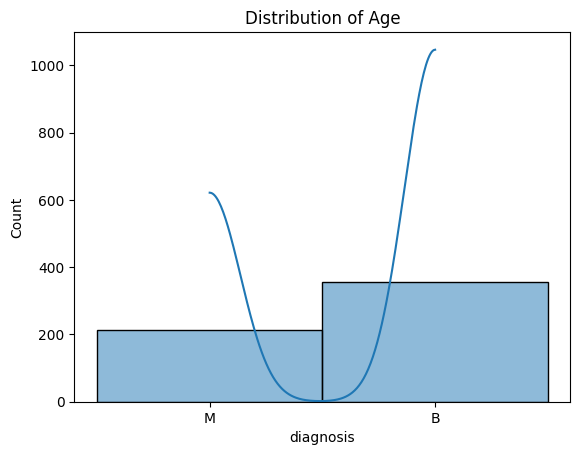

In [116]:
sns.histplot(df['diagnosis'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

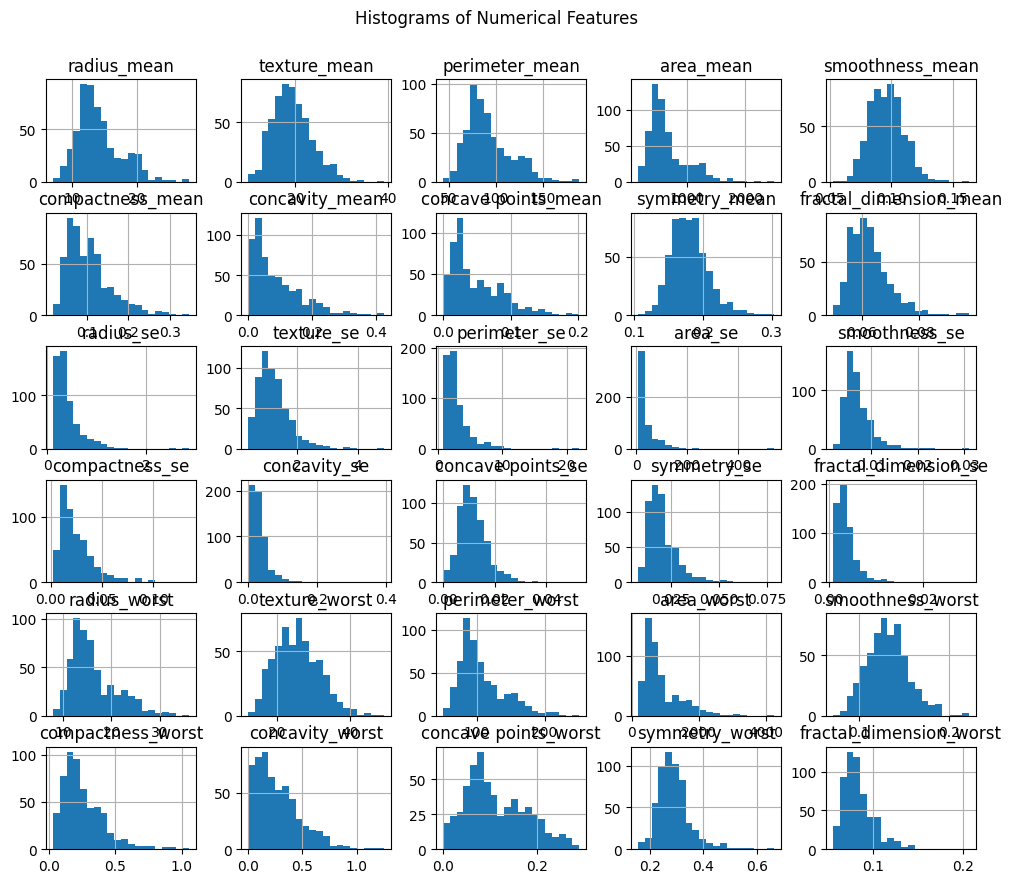

In [117]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=0.95)
plt.show()

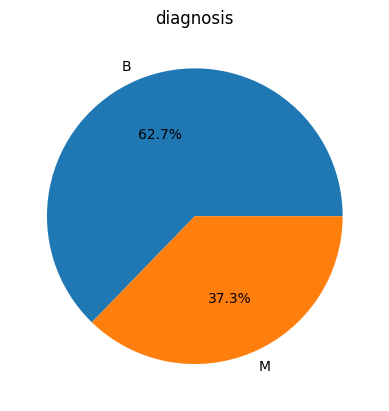

In [118]:
occupation_counts = df['diagnosis'].value_counts()
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title('diagnosis')
plt.show()

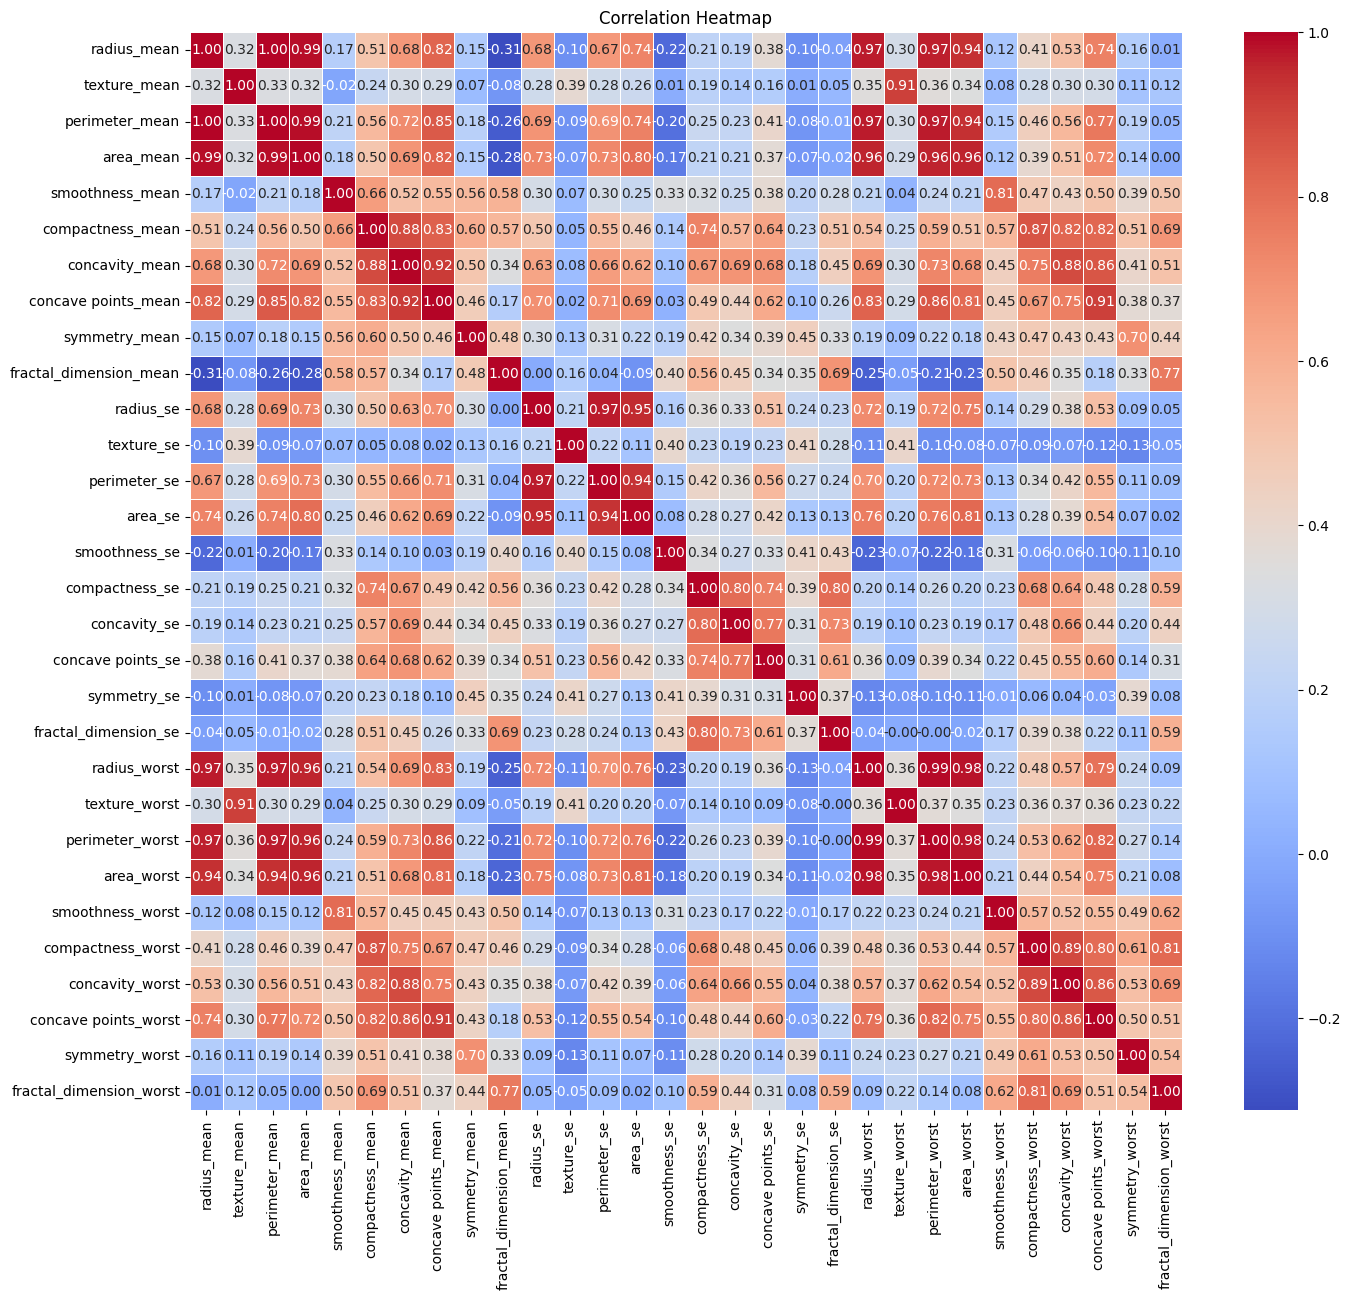

In [119]:
correlation_matrix = df.corr()

#Create a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Build Models

In [120]:
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

In [121]:
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [122]:
X= df.drop(["diagnosis"], axis=1)  
y= df["diagnosis"] 

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [124]:
# Scaling the data
preprocessor = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# LogisticRegression Model

In [125]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_scaled, y_train)
logistic_predictions = logistic_model.predict(x_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.9787234042553191


In [126]:
y_pred =logistic_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("-------------------------------")
print("Classification Report:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.98
-------------------------------
Classification Report:
Precision: 0.96
Recall: 0.99
F1-Score: 0.97


<AxesSubplot: >

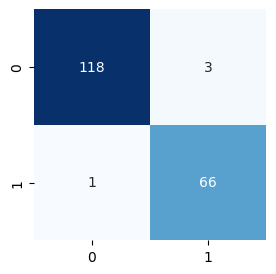

In [138]:
# Create a confusion matrix
cm = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Decision Trees

In [127]:

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train_scaled, y_train)
tree_predictions = tree_model.predict(x_test_scaled)
tree_accuracy = accuracy_score(y_test, tree_predictions)

print("\nDecision Trees Accuracy:", tree_accuracy)


Decision Trees Accuracy: 0.9202127659574468


In [128]:
y_pred = tree_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("-------------------------------")
print("Classification Report:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.92
-------------------------------
Classification Report:
Precision: 0.87
Recall: 0.91
F1-Score: 0.89


<AxesSubplot: >

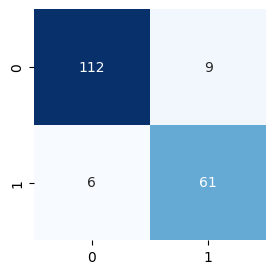

In [139]:
# Create a confusion matrix
cm = confusion_matrix(y_test,tree_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Random Forest

In [129]:

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(x_train_scaled, y_train)
forest_predictions = forest_model.predict(x_test_scaled)
forest_accuracy = accuracy_score(y_test, forest_predictions)

print("\nRandom Forest Accuracy:", forest_accuracy)


Random Forest Accuracy: 0.9627659574468085


In [130]:
y_pred = forest_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("-------------------------------")
print("Classification Report:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.96
-------------------------------
Classification Report:
Precision: 0.97
Recall: 0.93
F1-Score: 0.95


<AxesSubplot: >

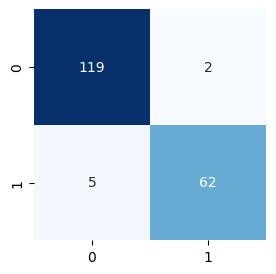

In [140]:
# Create a confusion matrix
cm = confusion_matrix(y_test,forest_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# SVM

In [131]:

svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train)
svm_predictions = svm_model.predict(x_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("\nSVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9680851063829787


In [100]:
y_pred = svm_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("-------------------------------")
print("Classification Report:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.97
-------------------------------
Classification Report:
Precision: 0.94
Recall: 0.97
F1-Score: 0.96


<AxesSubplot: >

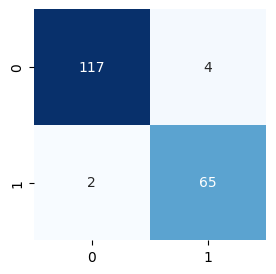

In [141]:
# Create a confusion matrix
cm = confusion_matrix(y_test,svm_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# KNN

In [132]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
knn_predictions = knn_model.predict(x_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("\nKNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9574468085106383


In [133]:
y_pred = knn_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("-------------------------------")
print("Classification Report:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.96
-------------------------------
Classification Report:
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


<AxesSubplot: >

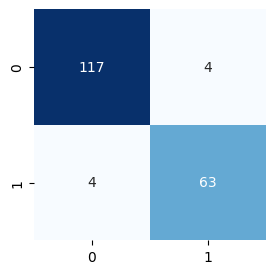

In [142]:
# Create a confusion matrix
cm = confusion_matrix(y_test,knn_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Naive Bayes

In [134]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train_scaled, y_train)
naive_bayes_predictions = naive_bayes_model.predict(x_test_scaled)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

print("\nNaive Bayes Accuracy:", naive_bayes_accuracy)


Naive Bayes Accuracy: 0.9361702127659575


In [135]:
y_pred = naive_bayes_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("-------------------------------")
print("Classification Report:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.94
-------------------------------
Classification Report:
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


<AxesSubplot: >

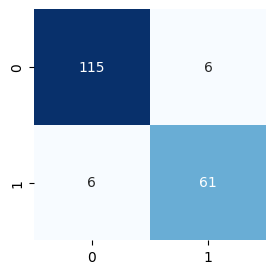

In [143]:
# Create a confusion matrix
cm = confusion_matrix(y_test,naive_bayes_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Create pipelines for each model

In [46]:

logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=42))
])

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])

naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

# Create a dictionary to store the pipelines
pipelines = {
    'Logistic Regression': logistic_pipeline,
    'Decision Tree': tree_pipeline,
    'Random Forest': forest_pipeline,
    'Support Vector Machines': svm_pipeline,
    'K - Nearest Neighbors': knn_pipeline,
    'Naive Bayes': naive_bayes_pipeline,
    'Gradient Boosting': gb_pipeline
}

# Train and evaluate all pipelines
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9787234042553191
Decision Tree Accuracy: 0.9202127659574468
Random Forest Accuracy: 0.9627659574468085
Support Vector Machines Accuracy: 0.9680851063829787
K - Nearest Neighbors Accuracy: 0.9574468085106383
Naive Bayes Accuracy: 0.9361702127659575
Gradient Boosting Accuracy: 0.9521276595744681


# Hyperprameter tunning

# Logistic Regression (grid_search)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
log_reg_grid.fit(x_train_scaled, y_train)
log_reg_best = log_reg_grid.best_estimator_
log_reg_pred = log_reg_best.predict(x_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression - Best parameters: ", log_reg_grid.best_params_)
print("Logistic Regression - Accuracy: ", log_reg_acc)

Logistic Regression - Best parameters:  {'C': 1}
Logistic Regression - Accuracy:  0.9787234042553191


# Decision Tree (grid_search)

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree_params = {'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'max_features': ['auto', 'sqrt', 'log2']}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid.fit(x_train_scaled, y_train)
tree_best = tree_grid.best_estimator_
tree_pred = tree_best.predict(x_test_scaled)
tree_acc = accuracy_score(y_test, tree_pred)
print("Decision Tree - Best parameters: ", tree_grid.best_params_)
print("Decision Tree - Accuracy: ", tree_acc)

Decision Tree - Best parameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree - Accuracy:  0.9574468085106383


# Random Forest (grid_search)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': ['auto', 'sqrt', 'log2']}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(x_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(x_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest - Best parameters: ", rf_grid.best_params_)
print("Random Forest - Accuracy: ", rf_acc)

Random Forest - Best parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Accuracy:  0.973404255319149


# Svm (grid_search)

In [51]:

from sklearn.svm import SVC
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid.fit(x_train_scaled, y_train)
svm_best = svm_grid.best_estimator_
svm_pred = svm_best.predict(x_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM - Best parameters: ", svm_grid.best_params_)
print("SVM - Accuracy: ", svm_acc)

SVM - Best parameters:  {'C': 10, 'gamma': 0.01}
SVM - Accuracy:  0.9840425531914894


# KNN (grid_search)

In [52]:

from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(x_train_scaled, y_train)
knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(x_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN - Best parameters: ", knn_grid.best_params_)
print("KNN - Accuracy: ", knn_acc)

KNN - Best parameters:  {'n_neighbors': 7, 'weights': 'uniform'}
KNN - Accuracy:  0.9574468085106383


# XGBoost (grid_search)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5)
gb_grid.fit(x_train_scaled, y_train)

# Get the best model
best_gb_model = gb_grid.best_estimator_

# Predict on the test set
gb_pred = best_gb_model.predict(x_test_scaled)

# Evaluate accuracy
gb_acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting - Accuracy: ", gb_acc)
print("Best parameters for Gradient Boosting: ", gb_grid.best_params_)

Gradient Boosting - Accuracy:  0.9521276595744681
Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'n_estimators': 200}


# Evaluating Models 

In [57]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors','Naive Bayes','Gradeint Boosting'],
    'Score': [log_reg_acc, tree_acc, rf_acc, svm_acc, knn_acc, naive_bayes_accuracy ,gb_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Support Vector Machines,0.984043
0,Logistic Regression,0.978723
2,Random Forest,0.973404
1,Decision Tree,0.957447
4,K - Nearest Neighbors,0.957447
6,Gradeint Boosting,0.952128
5,Naive Bayes,0.936170
